# Assignment

For this assignment, you are going to apply statistical inference on [Titanic dataset](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv).


Try to answer the following questions. Include a hypothesis and the test assumptions. **If the assumptions are valid**, try to conduct the t-test and addditionally calculate manually the 95% confidence interval which is derived from the hypothesis that you try to evaluate. Also try to come up with some valid findings from the data.



1. Is it true that the younger a passenger was, they had more chance of survival? Is this difference statistically important? 
2. Is there a correlation between fare price and survival? Again, is this difference statistically important?

As you are conducting the analysis, consider what other variables may be accounting for any significant differences you find. 

##### More specifically, the tasks that you need to enounter in your deliverables are:

1. Familiarize yourself with the dataset. Review the structure of it and focus on the fields necessary to answer the above mentioned questions.

2. State the null and the alternative hypotheses that address the questions.

3. Manipulate the dataset accordingly in order to prepare it for the statistical tests.

4. Perform an exploratory analysis with summary statistics and corresponding visualizations, in order to gain a clearer view about the distributions of the samples. Focus on their differences.

5. Perform the necessary normality checks in order to make sure that you can conduct the statistical tests.

6. Apply t-test statistic if you pass successfully the normality checks

7. For this exercise, you will also need to write a function to calculate the confidence interval using the standard error for comparing two means (used in t-statistic):

$$
    \bar{X_1} - \bar{X_2} \pm z*\sqrt{\dfrac{s_1^2}{n_1} + \dfrac{s_2^2}{n_2}}
$$

- $z$ is the critical value
- $s_1$ sample 1 standard deviation
- $s_2$ sample 2 standard deviation

- Let $z=1.96$ for a 95% confidence level

- Use the following method signature:

    `def get_95_ci(data1, data2)`
    

8. Elaborate on the results of your analyses.

In [3]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv'
titanic = pd.read_csv(url)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.groupby(['Survived'])[['Sex'] == ['female']].count()

KeyError: ignored

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


2. State the null and the alternative hypotheses that address the questions.

Null hypo = There is no difference in the mean of ages between passengers that survived or did not survive.


In [6]:
titanic_filtered = titanic.dropna(subset=['Age'])
titanic_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [7]:
titanic_S = titanic_filtered[(titanic_filtered['Survived'] == 1)]
titanic_S.info()
titanic_NS = titanic_filtered[(titanic_filtered['Survived'] == 0)]
titanic_NS.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  290 non-null    int64  
 1   Survived     290 non-null    int64  
 2   Pclass       290 non-null    int64  
 3   Name         290 non-null    object 
 4   Sex          290 non-null    object 
 5   Age          290 non-null    float64
 6   SibSp        290 non-null    int64  
 7   Parch        290 non-null    int64  
 8   Ticket       290 non-null    object 
 9   Fare         290 non-null    float64
 10  Cabin        125 non-null    object 
 11  Embarked     288 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 29.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  424 non-null    int64  
 1   Survived

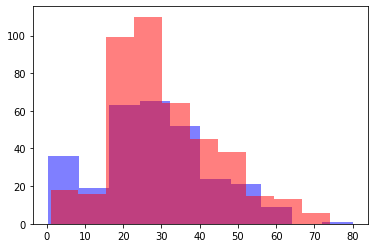

In [8]:
plt.hist(titanic_S['Age'], alpha = .5, color= 'b')
plt.hist(titanic_NS['Age'], alpha = .5, color= 'r')
plt.show()

In [9]:
# The normal distribution has a kurtosis of 0.
# The normal distribution has a skewness of 0.
# kurtosis from -3 to 3 and skewness from -3 to 3 is close enough for a t-test to work well

print(stats.describe(titanic_S['Age']))
print(stats.describe(titanic_NS['Age']))

DescribeResult(nobs=290, minmax=(0.42, 80.0), mean=28.343689655172415, variance=223.53096523207253, skewness=0.17952298982985943, kurtosis=-0.07723188107788648)
DescribeResult(nobs=424, minmax=(1.0, 74.0), mean=30.62617924528302, variance=200.84869836968645, skewness=0.5835101027554267, kurtosis=0.2652058747777071)


In [10]:
stats.ttest_ind(titanic_S['Age'], titanic_NS['Age']) 

Ttest_indResult(statistic=-2.06668694625381, pvalue=0.03912465401348249)

In [11]:
titanic_S.shape

(290, 12)

In [12]:
def get_95_ci(array_1, array_2):
  sample_1_n = array_1.shape[0]
  sample_2_n = array_2.shape[0]
  sample_1_mean = array_1.mean()
  sample_2_mean = array_2.mean()
  sample_1_var = array_1.var()
  sample_2_var = array_2.var()
  mean_difference = sample_2_mean - sample_1_mean
  std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
  margin_of_error = 1.96 * std_err_difference
  ci_lower = mean_difference - margin_of_error
  ci_upper = mean_difference + margin_of_error
  return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")


get_95_ci( titanic_S['Age'], titanic_NS['Age'])

'The difference in means at the 95% confidence interval (two-tail) is between 0.0959725945838561 and 4.469006585637352.'

Is there a correlation between fare price and survival? Again, is this difference statistically important?

titanic_S = titanic_filtered[(titanic_filtered['Survived'] == 1)]
titanic_S.info()
titanic_NS = titanic_filtered[(titanic_filtered['Survived'] == 0)]
titanic_NS.info()

In [14]:
titanic_s = titanic[(titanic['Survived'] == 1)]
titanic_s.info()

titanic_ns = titanic[(titanic['Survived'] == 0)]
titanic_ns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  342 non-null    int64  
 1   Survived     342 non-null    int64  
 2   Pclass       342 non-null    int64  
 3   Name         342 non-null    object 
 4   Sex          342 non-null    object 
 5   Age          290 non-null    float64
 6   SibSp        342 non-null    int64  
 7   Parch        342 non-null    int64  
 8   Ticket       342 non-null    object 
 9   Fare         342 non-null    float64
 10  Cabin        136 non-null    object 
 11  Embarked     340 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 34.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  549 non-null    int64  
 1   Survived

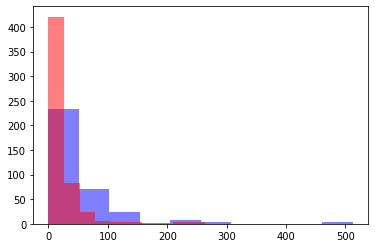

In [15]:
plt.hist(titanic_s['Fare'], alpha = .5 , color = 'b')
plt.hist(titanic_ns['Fare'], alpha = .5, color = 'r')
plt.show()

In [22]:
print(stats.describe(titanic_s['Fare']))
print(stats.describe(titanic_ns['Fare']))

DescribeResult(nobs=342, minmax=(0.0, 512.3292), mean=48.39540760233918, variance=4435.160158368154, skewness=3.8458166819167294, kurtosis=20.343694359915972)
DescribeResult(nobs=549, minmax=(0.0, 263.0), mean=22.117886885245902, variance=985.2195092053387, skewness=4.540690741165962, kurtosis=26.12023942326097)


Based on the given data, we are not able to conduct a meaningful t-test, and CI. Because, each of the distributions has highher than 3.8 skewness, and higher thatn 20 kurtosis.